In [1]:
import numpy as np
import matplotlib.pyplot

Set up a time frame of $t^i\in[0,1]$ with $n$ points in between. 

In [2]:
n=100;
t=np.ndarray((1,n));
dt = 1./n
for i in range(0,100):
    t[0][i] = i*dt

Now assume that the real demand for gas is driven by two nodes,
$$
\tilde{Y^i_1} = 1.5 + \sin(\gamma*t^i)
$$
and
$$
\tilde{Y^i_2} = 2 + \sin(\gamma*t^i + 2) .
$$

In [3]:
gamma = 2.*np.math.pi
Y1Real=np.ndarray((1,n))
Y2Real=np.ndarray((1,n))
for i in range(0,n):
    Y1Real[0][i] = 1.5 + np.math.sin(gamma*i*dt)
    Y2Real[0][i] = 2 + np.math.sin(gamma*i*dt+2)

Assume that there is a real supply, $\tilde{X_1}$, then
$$
\tilde{X^i_1} = \tilde{Y^i_1} + \tilde{Y^i_2} .
$$
Now observations of the meters we get some random noise added in, so let the noise be of the form
$$
X_1 = \tilde{X^i_1}( 1 + \xi^i) \text{ where } \xi^i ~ N(0,\sigma_X) 
$$
$$
Y_1 = \tilde{Y^i_1}( 1 + \nu_1^i) \text{ where } \nu_1^i ~ N(0,\sigma_1) 
$$
$$
Y_2 = \tilde{Y^i_2}( 1 + \nu_2^i) \text{ where } \nu_2^i ~ N(0,\sigma_2) 
$$
Now lets include an error in the form of an underread $c$ so that
$$
Y_* = \tilde{Y^i_*}( 1 -c + \nu_*^i) \text{ where } \nu_*^i ~ N(0,\sigma_*) 
$$


In [11]:
X1Real = Y1Real + Y2Real

mu =0.;sigma=0.025;sigma1=0.05;sigma2=0.05;

xi = np.random.normal(mu,sigma,n);
nu1 = np.random.normal(mu,sigma1,n);
nu2 = np.random.normal(mu,sigma2,n);

# choose the error to be in one variable
c  = 0
c1 = 0.3
c2 = 0.

X1 = X1Real*(1. - c + xi)
Y1 = Y1Real*(1. - c1 + nu1)
Y2 = Y2Real*(1. - c2 + nu2)

Now the UAG, $Z$, can be found as
$$
Z = X_1 - Y_1 - Y_2
$$

In [12]:
Z = X1 - Y1 - Y2

We can plot the real demand for gas as:

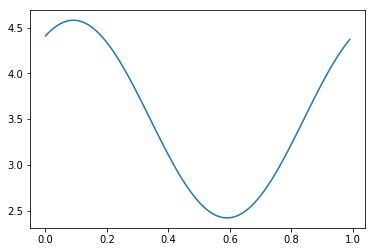

In [13]:
matplotlib.pyplot.plot(t[0],X1Real[0])

and the observations we have at each meter are

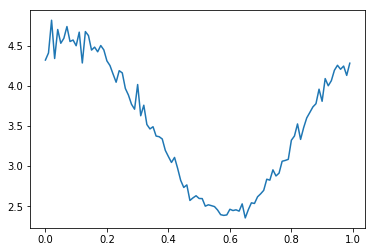

In [14]:
matplotlib.pyplot.plot(t[0],X1[0])

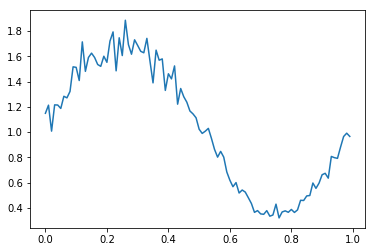

In [15]:
matplotlib.pyplot.plot(t[0],Y1[0])

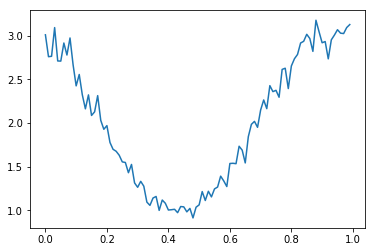

In [16]:
matplotlib.pyplot.plot(t[0],Y2[0])

Finally we can plot the UAG as

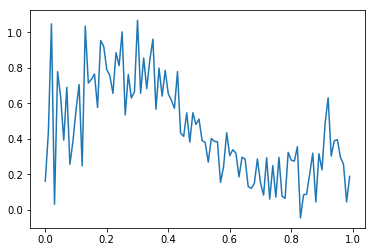

In [17]:
matplotlib.pyplot.plot(t[0],Z[0])

So we can see in the plot for $Z$ that there is higher values when $t\in[0.8,1]$. This seems to indicate that the error is most likely to have come from $Y_2$ which follows a sin wave with peak around $t=1$.

So how can we calculate the likelyhood for this?